# **Airline Customer Satisfaction Capstone**

## Pre-Processing & Training

Now that we have completed the first two sections of this project (the Data Wrangling and Exploratory Data Analysis), it is time to move on to pre-processing and training our data so that it can be used in upcoming models.

## 1. Table of Contents

[1. Table of Contents](#1.-Table-of-Contents)

[2. Import Packages](#2.-Import-Packages)

[3. Load Data](#3.-Load-Data)

[4. Explore the Data](#4.-Explore-the-Data)

[5. Dummy Variables](#5.-Dummy-Variables)

[6. Train/Test Split](#6.-Train/Test-Split)

## 2. Import Packages

In [79]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report,confusion_matrix
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report,plot_confusion_matrix

## 3. Load Data

In [43]:
df=pd.read_csv('/Users/lauren/Desktop/airline_data_cleaned2.csv')

# 4. Explore the Data

In [44]:
df.head()

,Unnamed: 0,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,0,1,Male,48,First-time,Business,Business,821,2,5.0,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,1,2,Female,35,Returning,Business,Business,821,26,39.0,...,5,4,5,5,3,5,2,5,5,Satisfied
2,2,3,Male,41,Returning,Business,Business,853,0,0.0,...,3,5,3,5,5,3,4,3,3,Satisfied
3,3,4,Male,50,Returning,Business,Business,1905,0,0.0,...,5,5,5,4,4,5,2,5,5,Satisfied
4,4,5,Female,49,Returning,Business,Business,3470,0,1.0,...,3,4,4,5,4,3,3,3,3,Satisfied


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              129880 non-null  int64  
 1   ID                                      129880 non-null  int64  
 2   Gender                                  129880 non-null  object 
 3   Age                                     129880 non-null  int64  
 4   Customer Type                           129880 non-null  object 
 5   Type of Travel                          129880 non-null  object 
 6   Class                                   129880 non-null  object 
 7   Flight Distance                         129880 non-null  int64  
 8   Departure Delay                         129880 non-null  int64  
 9   Arrival Delay                           129487 non-null  float64
 10  Departure and Arrival Time Convenience  1298

In [46]:
df.shape

(129880, 25)

In [47]:
df.dtypes

Unnamed: 0                                  int64
ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64


In [48]:
df.isnull().sum()

Unnamed: 0                                  0
ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service            

In [49]:
df=df.dropna(how='any')
df.isnull().sum()

Unnamed: 0                                0
ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment         

In [50]:
df = df.drop(['Unnamed: 0', 'ID'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129487 non-null  object 
 1   Age                                     129487 non-null  int64  
 2   Customer Type                           129487 non-null  object 
 3   Type of Travel                          129487 non-null  object 
 4   Class                                   129487 non-null  object 
 5   Flight Distance                         129487 non-null  int64  
 6   Departure Delay                         129487 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129487 non-null  int64  
 9   Ease of Online Booking                  129487 non-null  int64  
 10  Check-in Service                        1294

Of our target variable, Satisfaction, how many passengers are Satisfied and how many are Neutral or Dissatisfied?  Let's find out.

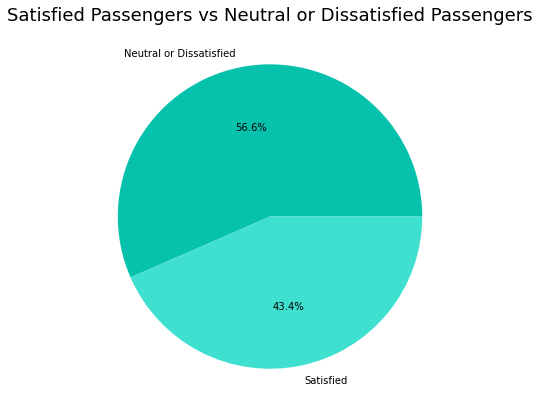

In [66]:
labels = df['Satisfaction'].value_counts().index
sizes = df['Satisfaction'].value_counts()
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = ['#06C2AC','#40E0D0'])
plt.title('Satisfied Passengers vs Neutral or Dissatisfied Passengers',color = 'black',fontsize = 18);

# 5. Dummy Variables

To use categorical variables in a machine learning model, we first need to represent them in a quantitative way.  In order to do that, we use dummy variables.

There are four categorical columns in our data: Gender, Customer Type, Type of Travel, Class, and Satisfaction.  Each of these columns will need to be converted to a dummy variable.

In [51]:
airline_data_encoded = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'])

In [52]:
print(airline_data_encoded.columns)

Index(['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction',
       'Gender_Female', 'Gender_Male', 'Customer Type_First-time',
       'Customer Type_Returning', 'Type of Travel_Business',
       'Type of Travel_Personal', 'Class_Business', 'Class_Economy',
       'Class_Economy Plus'],
      dtype='object')


In [53]:
airline_data_encoded.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Satisfaction,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,48,821,2,5.0,3,3,4,3,3,3,...,Neutral or Dissatisfied,0,1,1,0,1,0,1,0,0
1,35,821,26,39.0,2,2,3,5,2,5,...,Satisfied,1,0,0,1,1,0,1,0,0
2,41,853,0,0.0,4,4,4,5,4,3,...,Satisfied,0,1,0,1,1,0,1,0,0
3,50,1905,0,0.0,2,2,3,4,2,5,...,Satisfied,0,1,0,1,1,0,1,0,0
4,49,3470,0,1.0,3,3,3,5,3,3,...,Satisfied,1,0,0,1,1,0,1,0,0


In [54]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [55]:
airline_data_encoded

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,Satisfaction,Gender_Female,Gender_Male,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,48,821,2,5.0,3,3,4,3,3,3,...,Neutral or Dissatisfied,0,1,1,0,1,0,1,0,0
1,35,821,26,39.0,2,2,3,5,2,5,...,Satisfied,1,0,0,1,1,0,1,0,0
2,41,853,0,0.0,4,4,4,5,4,3,...,Satisfied,0,1,0,1,1,0,1,0,0
3,50,1905,0,0.0,2,2,3,4,2,5,...,Satisfied,0,1,0,1,1,0,1,0,0
4,49,3470,0,1.0,3,3,3,5,3,3,...,Satisfied,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,28,447,2,3.0,4,4,4,4,2,5,...,Neutral or Dissatisfied,0,1,0,1,0,1,0,0,1
129876,41,308,0,0.0,5,3,5,3,4,5,...,Neutral or Dissatisfied,0,1,0,1,0,1,0,0,1
129877,42,337,6,14.0,5,2,4,2,1,3,...,Neutral or Dissatisfied,0,1,0,1,0,1,0,0,1
129878,50,337,31,22.0,4,4,3,4,1,4,...,Satisfied,0,1,0,1,0,1,0,0,1


# 6. Train/Test Split

We need to split the data into a training set and a testing set.

First, let's determine the partition sizes for a 70/30 train/test split:

In [56]:
len(airline_data_encoded) * .7, len(airline_data_encoded) * .3

(90640.9, 38846.1)

In [57]:
airline_data_encoded = airline_data_encoded.reset_index()

X_train, X_test, y_train, y_test = train_test_split(airline_data_encoded.drop(columns = ['Satisfaction']),
                                                    airline_data_encoded.Satisfaction, stratify=airline_data_encoded.Satisfaction,
                                                    test_size = 0.3,
                                                    random_state = 47)

We used our dummy variables from above in our train/test split.  We also performed a stratified train test split of the dataset.  Stratification is done for classifition machine learning problems to avoid overfitting or underfitting, as it helps to ensure that the target variable (in this case, "Satisfaction") will have the same distribution in our training data.

In [58]:
X_train.shape, X_test.shape

((90640, 28), (38847, 28))

In [59]:
y_train.shape, y_test.shape

((90640,), (38847,))

In [60]:
# Construct the LogisticRegression model
clf = LogisticRegression(max_iter=1000)

# Fit the model on the training data.
clf.fit(X_train, y_train) 

# Print the accuracy from the testing data.
# Introduce variable to be reused later
y_predict_test = clf.predict(X_test)
print("\n")
print("[Test] Accuracy score (y_predict_test, y_test):",accuracy_score(y_predict_test, y_test))

# Note the order in which the parameters must be passed
# according to the documentation ... although there should be
# no difference since it is a one-to-one comparison ...
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print("\n")
print("[Test] Accuracy score: (y_test, y_predict_test)",accuracy_score(y_test, y_predict_test))

y_predict_training = clf.predict(X_train)
print("\n")
print("[Training] Accuracy score: (y_train, y_predict_training)",accuracy_score(y_train, y_predict_training))



[Test] Accuracy score (y_predict_test, y_test): 0.7737277009807707


[Test] Accuracy score: (y_test, y_predict_test) 0.7737277009807707


[Training] Accuracy score: (y_train, y_predict_training) 0.7773278905560459


Both the training accuracy and testing accuracy are very close, meaning that there is no "variance."  However, since the model's training accuracy is below 100%, that shows that there is some bias in this model.

In [61]:
from sklearn.metrics import classification_report
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report

print("[Training Classification Report]")
print(classification_report(y_train, y_predict_training))

print("[Test Classification Report]")
print(classification_report(y_test, y_predict_test))

[Training Classification Report]
                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.81      0.80      0.80     51257
              Satisfied       0.74      0.75      0.75     39383

               accuracy                           0.78     90640
              macro avg       0.77      0.77      0.77     90640
           weighted avg       0.78      0.78      0.78     90640

[Test Classification Report]
                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.81      0.79      0.80     21968
              Satisfied       0.73      0.75      0.74     16879

               accuracy                           0.77     38847
              macro avg       0.77      0.77      0.77     38847
           weighted avg       0.77      0.77      0.77     38847



The above details the precision, recall, and f1-score for both the training and test datasets.  Precision refers to the number of positive class predictions that belong to the positive class, while recall refers to the number of positive class predictions made out of all the positive examples in the entire dataset.  The f1-score refers to the mean between precision and recall, and generally speaking, higher f1 scores are better.

So what is the above telling us?  The precision between both datasets is the same for Neutral or Dissatisfied, while the training dataset did a little better with our target variable, Satisfied.  Furthermore, we can also see that the recall is slightly better for the training dataset with respect to the Neutral or Dissatisfied.

Additionally, we can see that the precision and recall drops within each class.  The training classification report details that the precision of Neutral or Dissatisfied is 0.81, while the precision of Satisfied is only 0.74.  Similarly, the test classification report details that the precision of Neutral or Dissatisfied is 0.81, while the precision of Satisfied is 0.73.  

This report is also showing us how much support there is for each variable.  As expected, the training dataset is much larger than the testing dataset.  

Text(0.5, 15.0, 'Predicted')

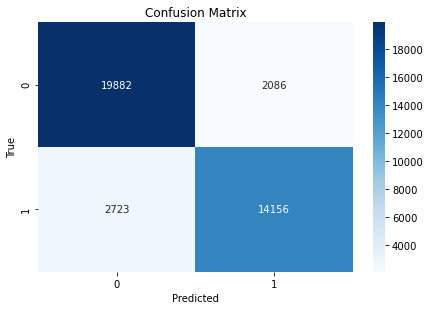

In [98]:
from sklearn import metrics
matrix = metrics.confusion_matrix(y_test, predictions)

fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="Blues" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')

In [1]:
accuracy = (14156+19882)/(14156+19882+2086+2723)
print(accuracy)

0.8762066568847016


The above depicts a confusion matrix.  Confusion matrices are useful for measuring recall, precision, and accuracy.  It is a visual representation of actual versus predicted values.  There are four elements of a confusion matrix:

True Positive: The values which were actually positive and were predicted positive.

False Positive: The values which were actually negative but falsely predicted as positive. Also known as Type I Error.

False Negative: The values which were actually positive but falsely predicted as negative. Also known as Type II Error.

True Negative: The values which were actually negative and were predicted negative.

So knowing that, the above confusion matrix illustrates the following:

True Positives = 14,156

False Positives = 2,086

False Negatives = 2,723

True Negatives = 19,882

The accuracy of the confusion matrix is approximately 0.8762. 

In this notebook we have examined the data, pre-processed it, performed a train/test split, and constructed a Logistic Regression model.  The Logistic Regression model fit the data fairly well, as we can see with the classification report and confusion matrix.  